#### EMOTION DETECTION DATASET

## 1.0 DATA SOURCES
The Sentiment Analysis and Emotion Detection dataset was obtained from Kaggle, a leading platform for data science challenges and collaboration. Kaggle empowers data professionals by offering access to diverse datasets and tools to explore real-world problems across various domains.

This dataset falls under the Social Media and Natural Language Processing (NLP) domain and is typically provided in CSV format. It contains user-generated text data, often sourced from platforms like Twitter, labeled with sentiment categories (e.g., positive, negative, neutral) and emotional states (e.g., joy, anger, sadness).

You can explore similar datasets by searching “Sentiment Analysis” or “Emotion Detection” on Kaggle.


You can access the dataset via the following link: [Sentiment Analysis and Emotion Analysis Dataset on Kaggle](https://www.kaggle.com/datasets/kushagra3204/sentiment-and-emotion-analysis-dataset/data)

## 1.1 TOOLS AND ENVIRONMENT
Python Notebook (Jupyter Notebook)

## 1.2 MODELLING APPROACH
Model Build with Random Forest Classifier (LR)

Model Build with Random Forest Classifier (RF)

Model Build with Decision Tree Classifier (DT)

Model Build with Extreme Gradient Boosting (XGB)

Model Build with Long Short-Term Memory (LSTM)

Model Build with Feedforward Neural Network (GRU)

Model Build with Feedforward Neural Network (CNN)

In [62]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [64]:

# Standard libraries
import os
import random
import shutil
import warnings
import import_ipynb
import sys

# Data processing libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import scipy.stats as stats
import pyforest
from wordcloud import WordCloud

# Terminal formatting
from colorama import Fore, Style
from termcolor import colored

# Scikit-learn utilities
from sklearn.model_selection import (
    train_test_split, RepeatedStratifiedKFold, StratifiedKFold, KFold,
    cross_val_predict, cross_val_score, cross_validate, GridSearchCV
)
from sklearn.preprocessing import (
    StandardScaler, PolynomialFeatures, OneHotEncoder, PowerTransformer,
    MinMaxScaler, LabelEncoder, RobustScaler, label_binarize
)
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, r2_score,
    mean_absolute_error, mean_squared_error, classification_report,
    confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc,
    make_scorer, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
)
from sklearn.linear_model import (
    LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVR, SVC
from sklearn.ensemble import (
    RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor,
    ExtraTreesRegressor, AdaBoostClassifier
)
from sklearn.feature_selection import (
    SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import TfidfVectorizer

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Optimization and tuning
from skopt import BayesSearchCV
from keras_tuner import BayesianOptimization
from keras_tuner.tuners import BayesianOptimization as KerasBayesianOptimization

# XGBoost
from xgboost import XGBClassifier, XGBRegressor, plot_importance

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    LSTM, GRU, Conv1D, GlobalMaxPooling1D, Embedding, Dense, Dropout
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [65]:
import sys
sys.modules.pop('MSC_sent_emotion_analysis.model_src_code.functions.model_func', None)
import importlib
import MSC_sent_emotion_analysis.model_src_code.functions.model_function

importlib.reload(MSC_sent_emotion_analysis.model_src_code.functions.model_function)
from MSC_sent_emotion_analysis.model_src_code.functions.model_function import *

In [66]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Configurations
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", 200)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Initialize plotly and cufflinks
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [67]:
data_path = '../dataset/combined_sentiment_data.csv'

In [68]:
df_sent = pd.read_csv(data_path)
df_sent=df_sent.copy()

In [69]:
print(len(df_sent))
print(len(df_sent.columns))

3309
2


In [70]:
#Check for top 5 datas using .head()
df_sent.head()

sentence sentiment
0  So there is no way for me to plug it in here i...  negative
1                        Good case, Excellent value.  positive
2                             Great for the jawbone.  positive
3  Tied to charger for conversations lasting more...  negative
4                                  The mic is great.  positive

In [71]:
#Check for last 5 datas using .tail()
df_sent.sample(5)

sentence sentiment
52    A usable keyboard actually turns a PDA into a ...  positive
680                And none of the tones is acceptable.  negative
1376  This was such an awesome movie that i bought i...  positive
1237  But what really made it unwatchable was the di...  negative
203   The best electronics of the available FM Trans...  positive

In [72]:
df_sent.describe()

sentence sentiment
count      3309      3309
unique     3289         2
top      #NAME?  positive
freq          4      1679

In [73]:
check_missing_values(df_sent)

Missing_Number  Missing_Percent
sentence            0.000            0.000
sentiment           0.000            0.000

In [74]:
inspect_columns(df_sent, cols=['sentence', 'sentiment'])

Column Name  Percentage Nulls (%)  Number of Nulls  Number of Unique  \
0    sentence                 0.000                0              3289   
1   sentiment                 0.000                0                 2   

                                        Value Counts  
0  {'#NAME?': 4, 'This is a great deal.': 2, 'Def...  
1               {'positive': 1679, 'negative': 1630}

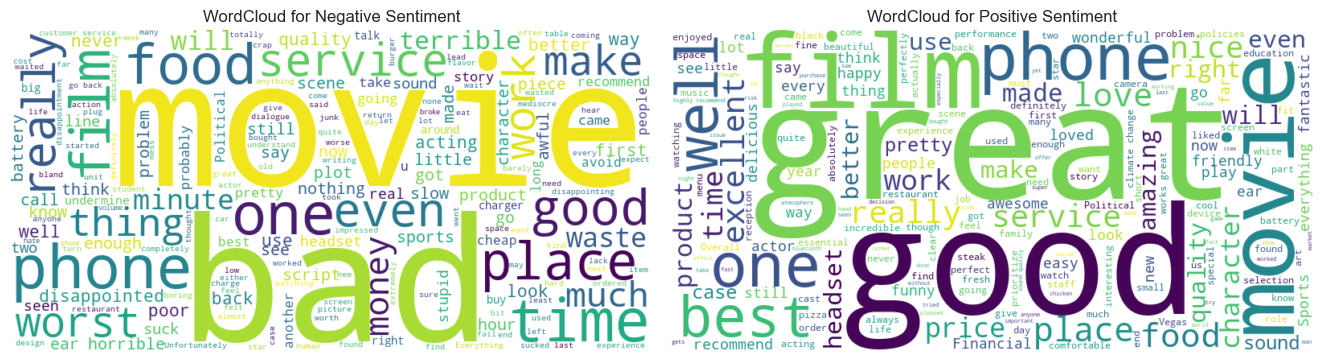

In [75]:
plot_wordcloud(df_sent, 'sentiment', 'sentence')

In [76]:
df_sent = df_sent.dropna(subset=['sentence', 'sentiment'])


=== logistic_regression ===
Best Params: OrderedDict([('C', 22.364202820542708)])

Comparison of Metrics Between Logistic Regression Models:


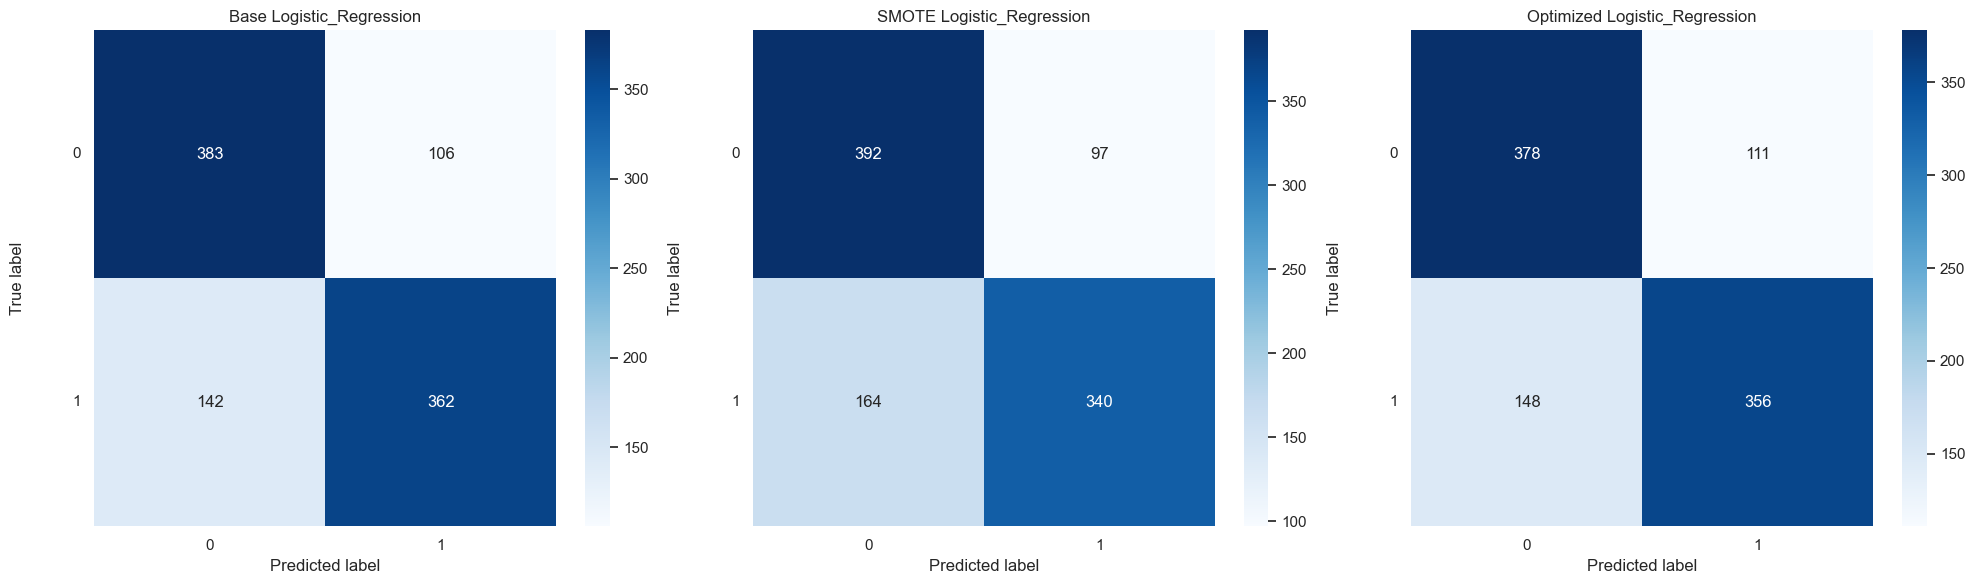

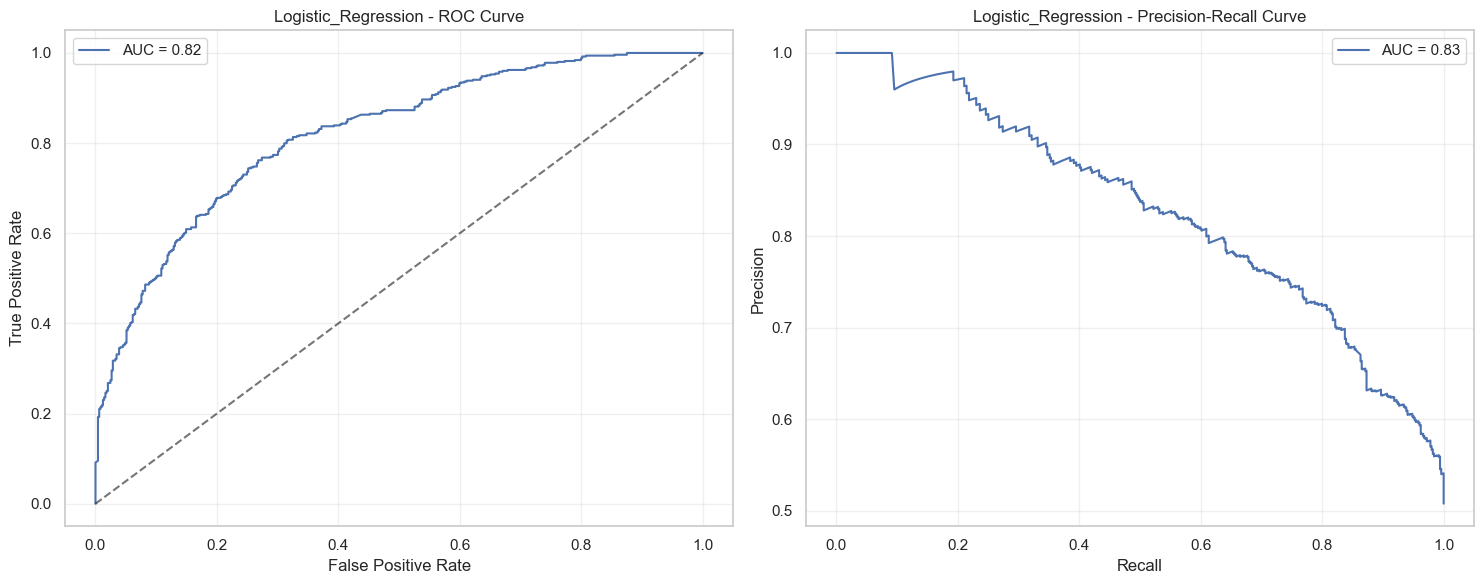

In [77]:
# === RUN END-TO-END ===
results, preds, best_model = run_ml_workflow(df_sent, "sentence", "sentiment", "logistic_regression")
# Append the optimized summary
append_optimized_metrics(results, "logistic_regression", best_model)

# Display summary
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between Logistic Regression Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_confusion_matrices(preds, "Logistic_Regression")
plot_training_metrics(preds, "Logistic_Regression")


=== naive_bayes ===
Best Params: OrderedDict([('alpha', 0.3972893133963027)])

Comparison of Metrics Between Naive Bayes Models:


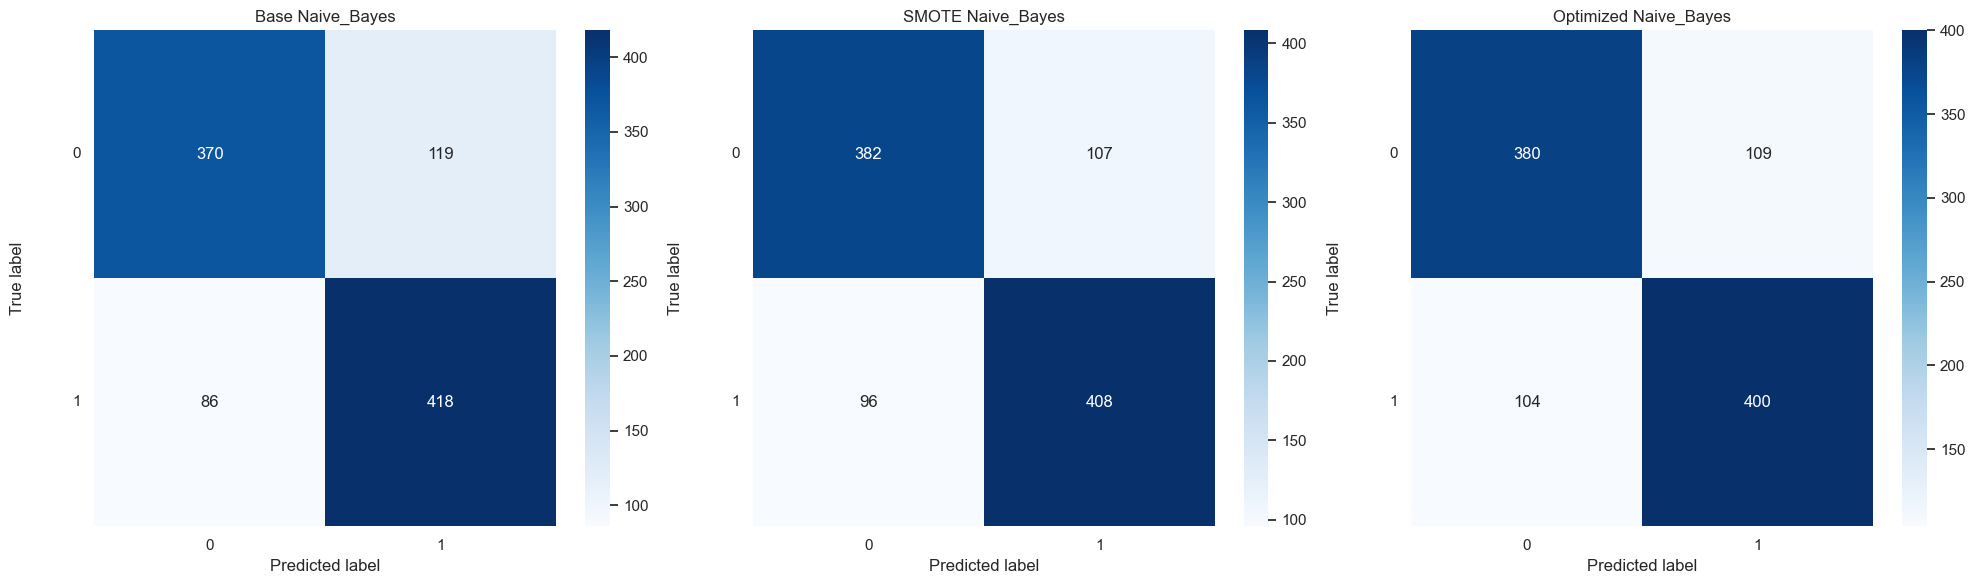

In [78]:
results, preds, best_model = run_ml_workflow(df_sent, "sentence", "sentiment", "naive_bayes")
# Append the optimized summary
append_optimized_metrics(results, "naive_bayes", best_model)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between Naive Bayes Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_confusion_matrices(preds, "Naive_Bayes")


=== random_forest ===
Best Params: OrderedDict([('max_depth', 13), ('n_estimators', 182)])

Comparison of Metrics Between Random Forest Models:


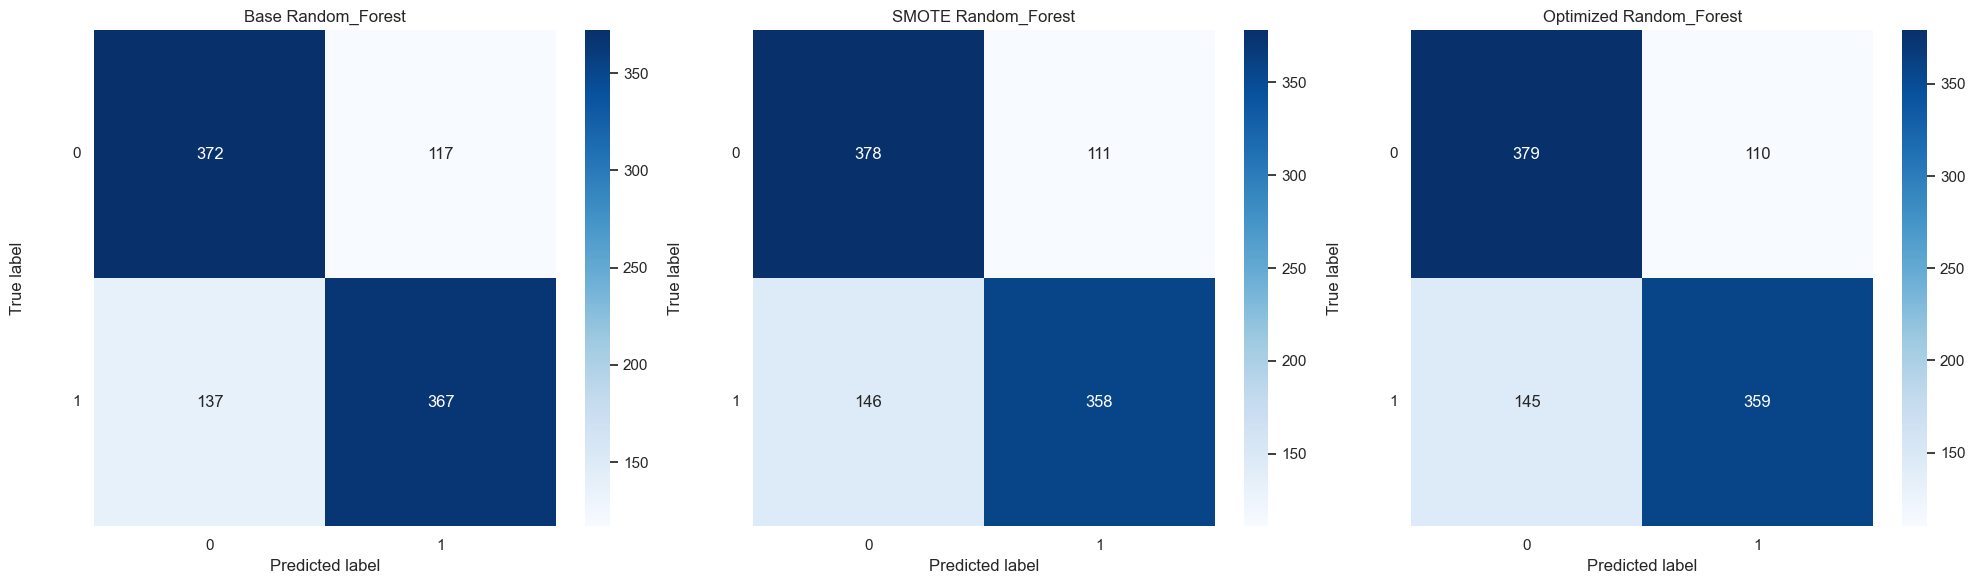

In [79]:
results, preds, best_model = run_ml_workflow(df_sent, "sentence", "sentiment", "random_forest")
# Append the optimized summary
append_optimized_metrics(results, "random_forest", best_model)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between Random Forest Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_confusion_matrices(preds, "Random_Forest")


=== xgboost ===


/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:49:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:49:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:49:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:49:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

Best Params: OrderedDict([('learning_rate', 0.045401641878176635), ('max_depth', 8), ('n_estimators', 66)])

Comparison of Metrics Between XGBoost Models:


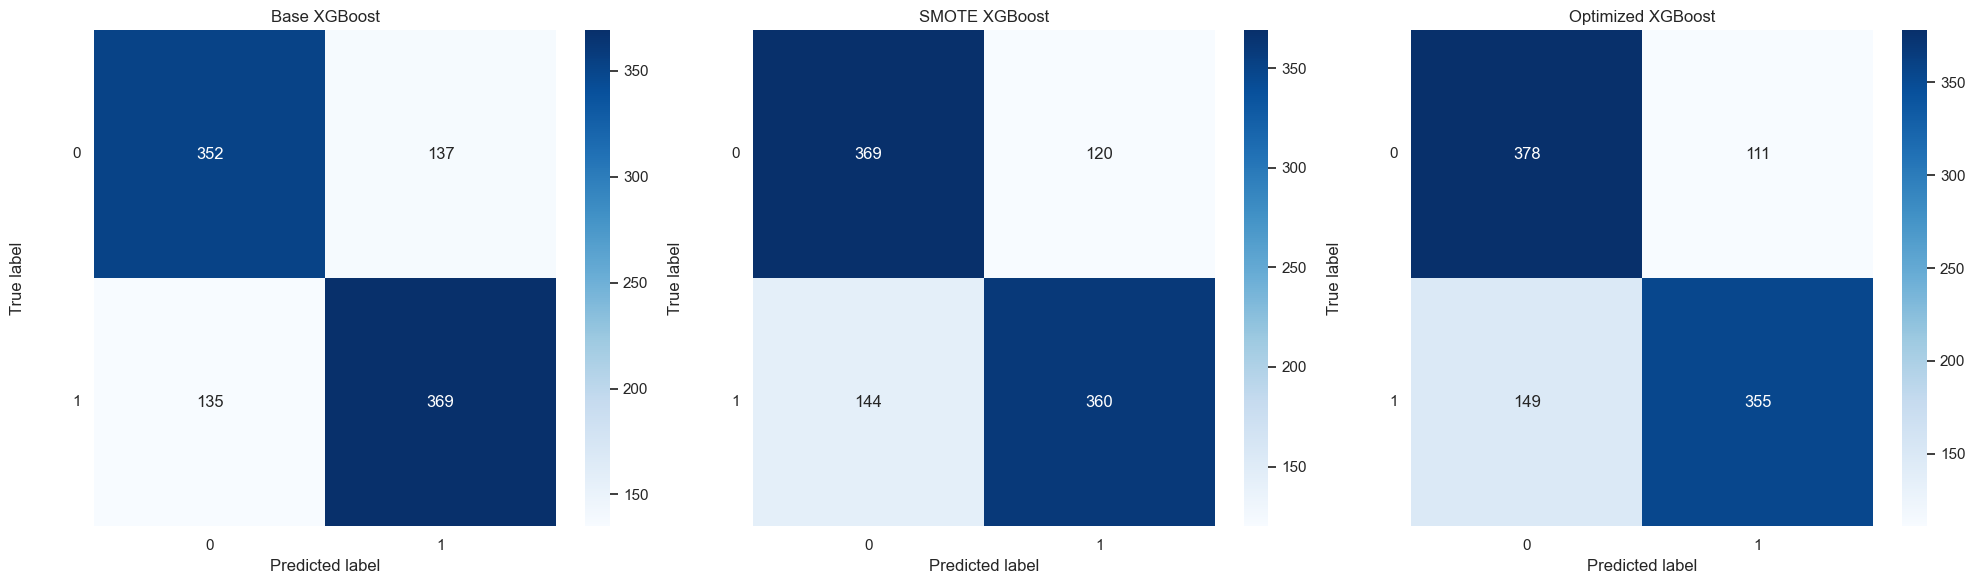

In [80]:
results, preds, best_model = run_ml_workflow(df_sent, "sentence", "sentiment", "xgboost")
# Append the optimized summary
append_optimized_metrics(results, "xgboost", best_model)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between XGBoost Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_confusion_matrices(preds, "XGBoost")

## DEEP LEARNING MODEL

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step

Comparison of Metrics Between LSTM Models:


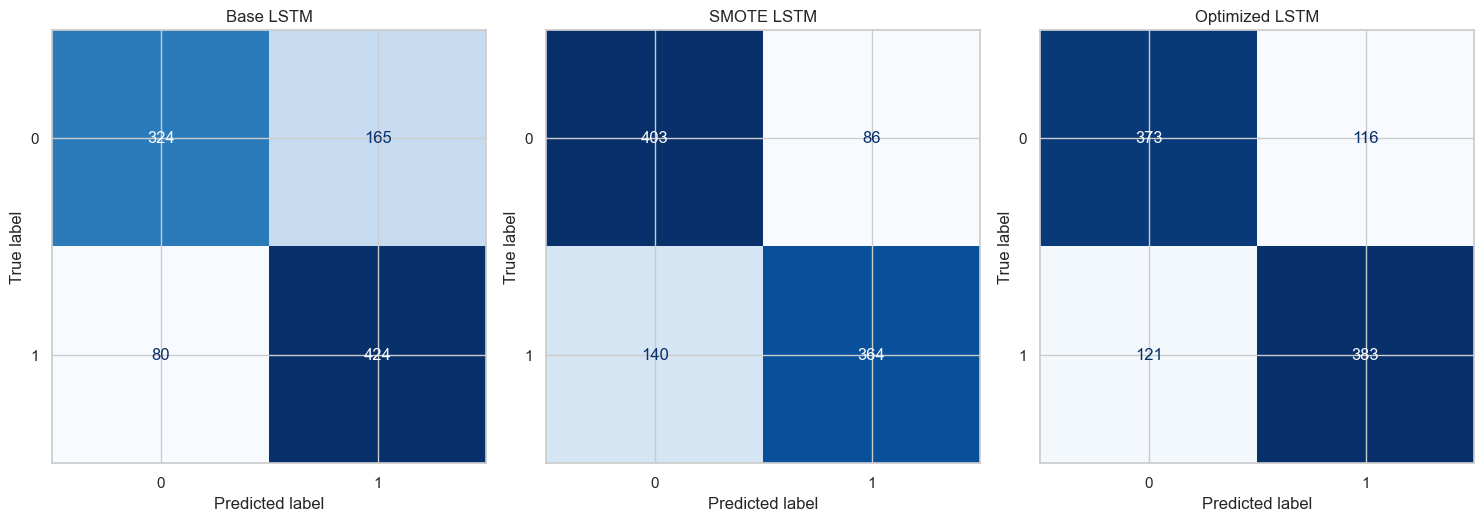

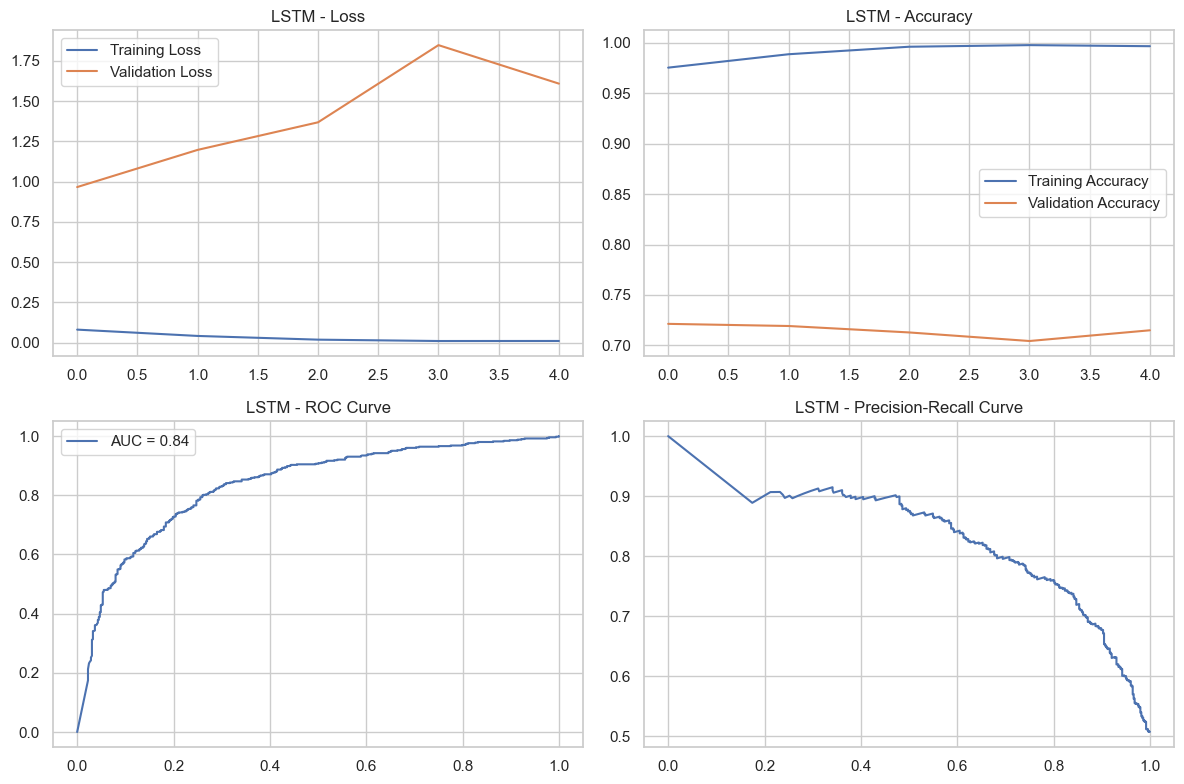

In [81]:
results, preds, opt_history = run_dl_workflow(df_sent, "sentence", "sentiment", "LSTM")
# Append the optimized summary
append_optimized_metrics(results, "LSTM", opt_history)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between LSTM Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_dl_confusion_matrices(preds, "LSTM")
plot_dl_training_metrics(opt_history, preds, "LSTM")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Comparison of Metrics Between GRU Models:


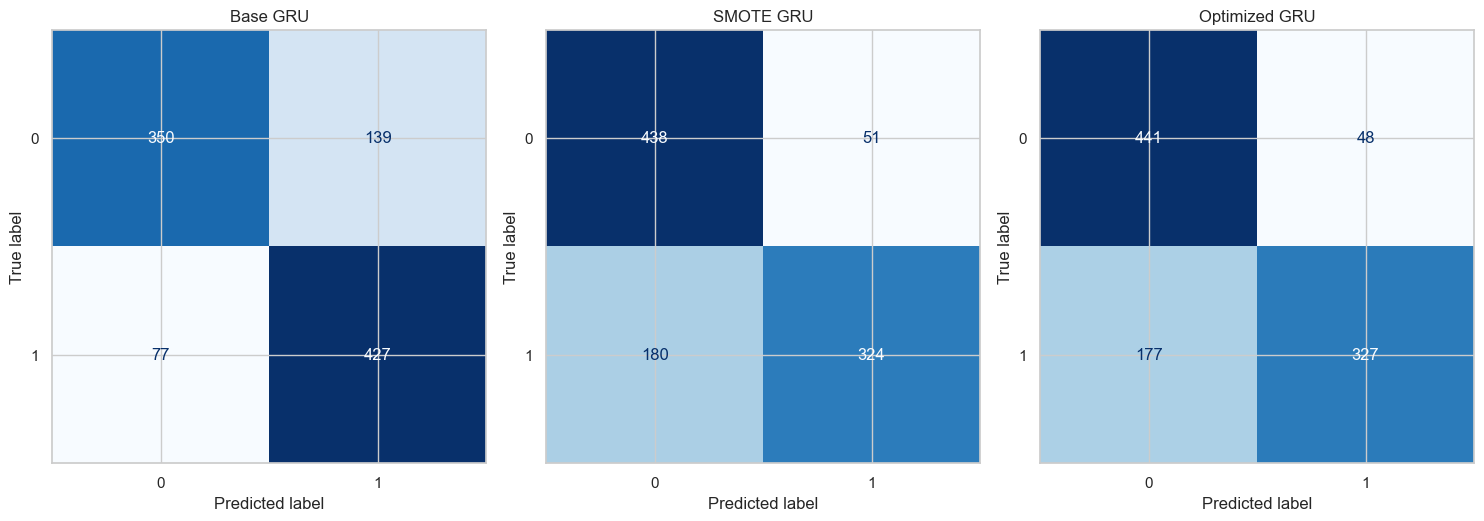

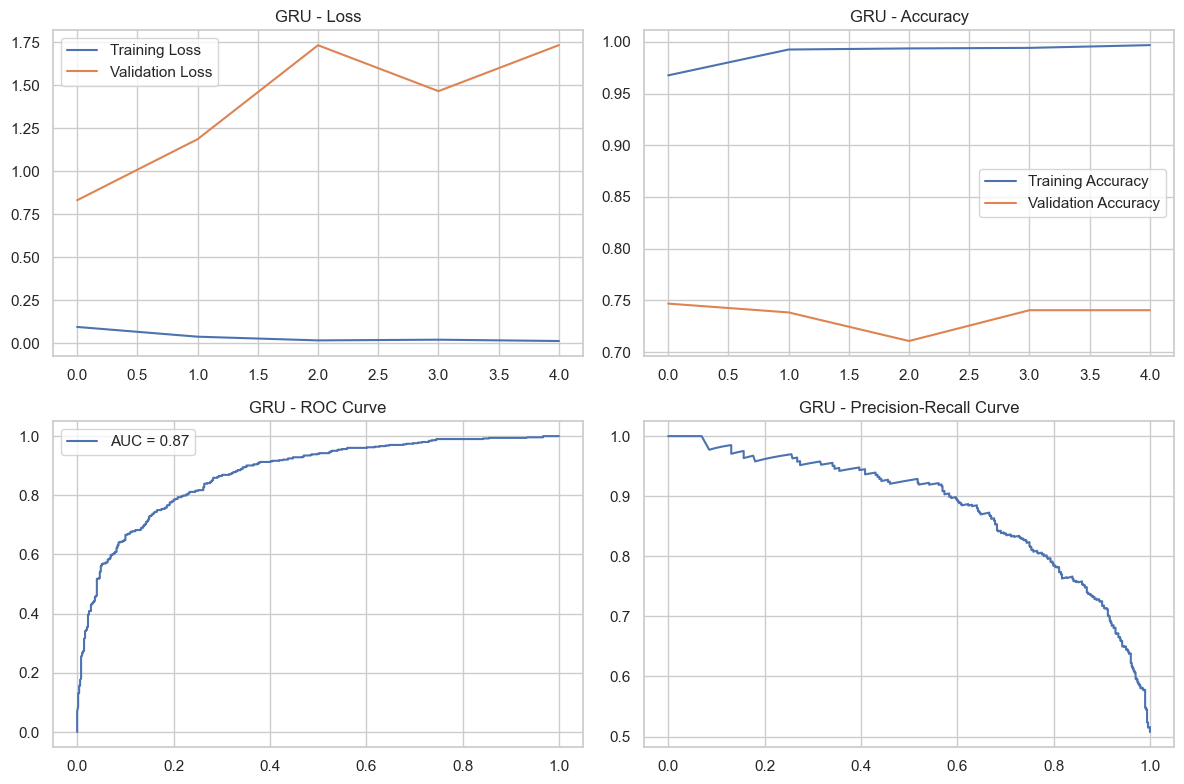

In [82]:
## DEEP LEARNING MODEL
results, preds, opt_history = run_dl_workflow(df_sent, "sentence", "sentiment", "GRU")
# Append the optimized summary
append_optimized_metrics(results, "GRU", opt_history)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between GRU Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_dl_confusion_matrices(preds, "GRU")
plot_dl_training_metrics(opt_history, preds, "GRU")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Comparison of Metrics Between CNN Models:


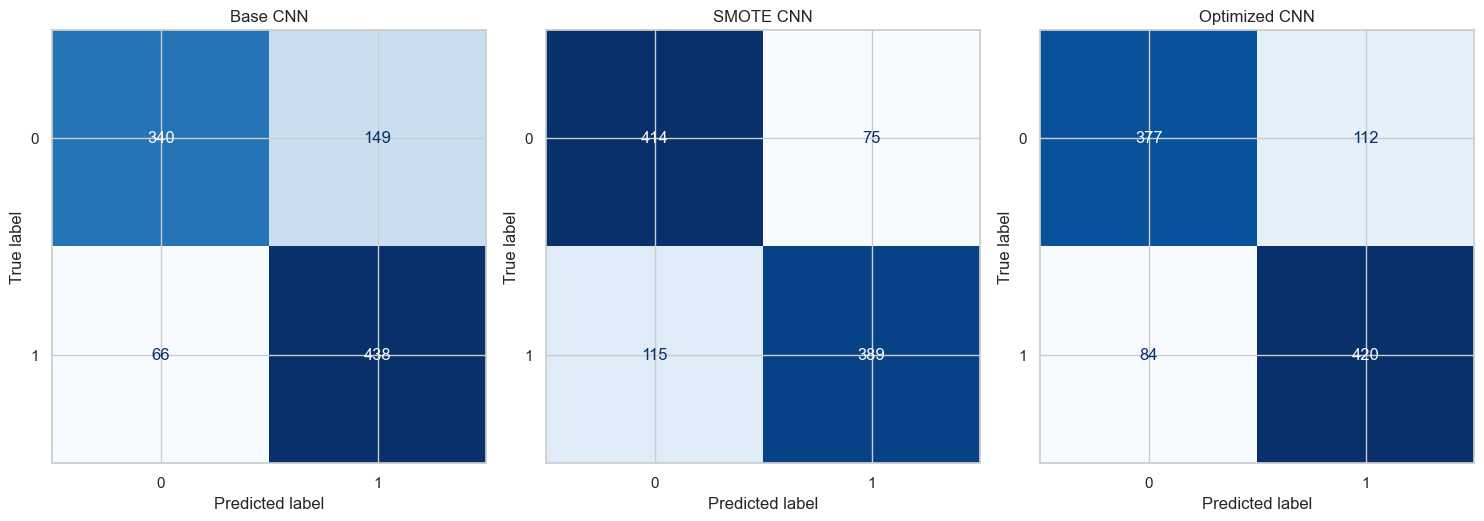

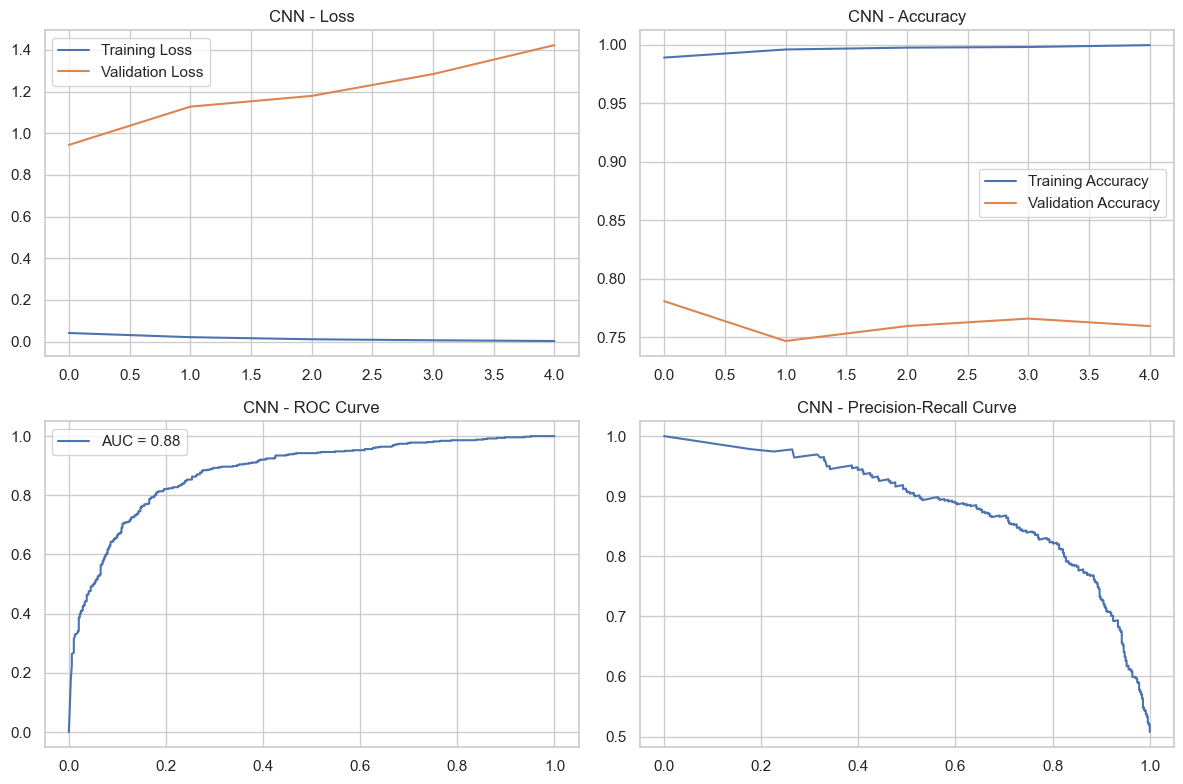

In [83]:
## DEEP LEARNING MODEL
results, preds, opt_history = run_dl_workflow(df_sent, "sentence", "sentiment", "CNN")
# Append the optimized summary
append_optimized_metrics(results, "CNN", opt_history)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between CNN Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_dl_confusion_matrices(preds, "CNN")
plot_dl_training_metrics(opt_history, preds, "CNN")

In [84]:
import joblib
import pandas as pd

opt_summary_df = pd.DataFrame(optimized_models_summary)

# # Sort by F1-Score in descending order
ranked_df = opt_summary_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)
ranked_df["Rank"] = ranked_df.index + 1           # rank column
df_rank = ranked_df.drop(columns=['Rank'], errors='ignore')

df_rank = df_rank.copy()

In [85]:
# Get best model
best_model_row = df_rank.iloc[0]
best_model = best_model_row["Object"]
model_name = best_model_row["Model"].lower()  # Convert to lowercase

# Save only the best model separately
print("Best model:", best_model_row["Model"])
joblib.dump(best_model, f"../save_models/sent_{model_name}_best_model.pkl")

Best model: CNN


['../save_models/sent_cnn_best_model.pkl']

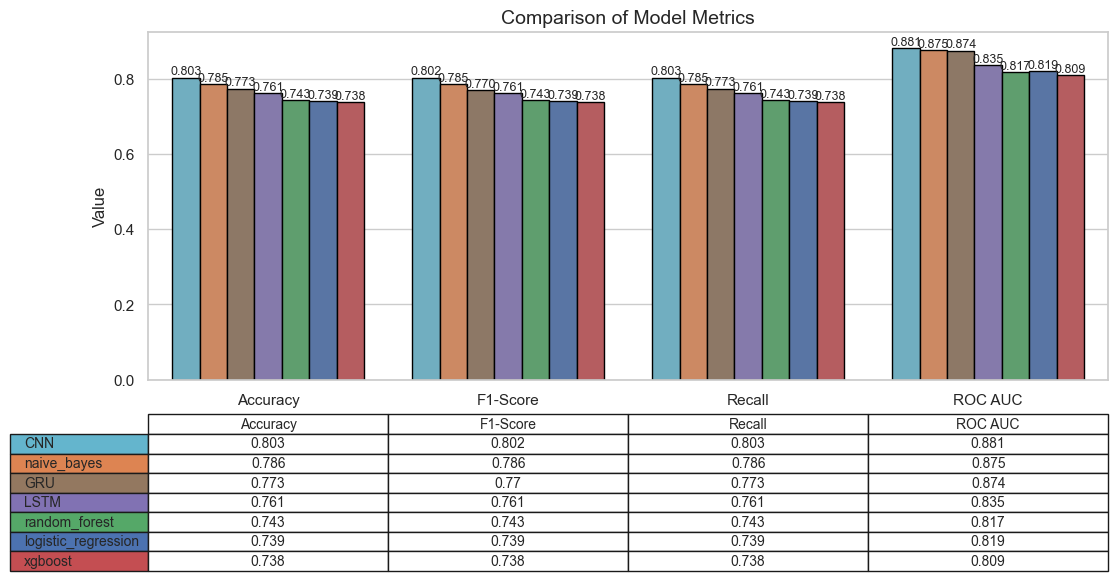

In [86]:
plot_model_comparison(df_rank)